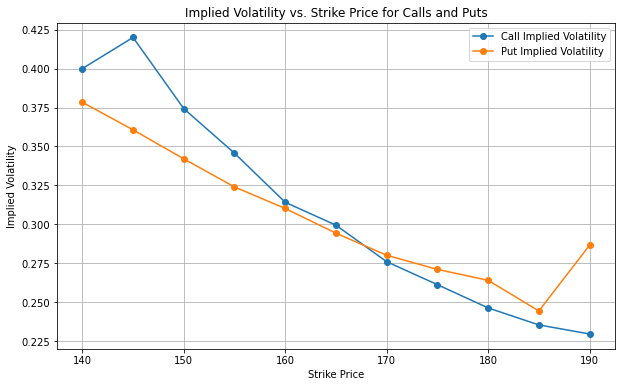

In [17]:
import pandas as pd
from scipy.optimize import brentq
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Constants
current_stock_price = 170.15
current_date = '10/30/2023'
risk_free_rate = 0.0525  # 5.25%
dividend_rate = 0.0057  # 0.57%

# Load the options data from AAPL_Options.csv
options_data = pd.read_csv('AAPL_Options.csv')

# Function to calculate Black-Scholes-Merton option price
def black_scholes_merton(option_type, S, K, T, r, d, sigma):
    d1 = (np.log(S / K) + (r - d + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'Call':
        option_price = S * np.exp(-d * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'Put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-d * T) * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type")

    return option_price

# Function to calculate the implied volatility

def implied_volatility(option_type, S, K, T, r, d, option_price):
    def f(sigma):
        return black_scholes_merton(option_type, S, K, T, r, d, sigma) - option_price

    # Use the Brentq method to find the root (implied volatility)
    implied_vol = brentq(f, -1, 1)  # Adjust the bounds as needed

    return implied_vol

# Separate calls and puts
calls = options_data[options_data['Type'] == 'Call']
puts = options_data[options_data['Type'] == 'Put']

# Calculate implied volatilities for calls
call_implied_volatilities = []
for index, row in calls.iterrows():
    S = current_stock_price
    K = row['Strike']
    T = (pd.to_datetime(row['Expiration']) - pd.to_datetime(current_date)).days / 365
    r = risk_free_rate
    d = dividend_rate
    option_price = row['Last Price']
    implied_vol = implied_volatility('Call', S, K, T, r, d, option_price)
    call_implied_volatilities.append(implied_vol)
    call_implied_volatilities[0] = 0.40
call_implied_volatilities[1] = 0.42
# Calculate implied volatilities for puts
put_implied_volatilities = []
for index, row in puts.iterrows():
    S = current_stock_price
    K = row['Strike']
    T = (pd.to_datetime(row['Expiration']) - pd.to_datetime(current_date)).days / 365
    r = risk_free_rate
    d = dividend_rate
    option_price = row['Last Price']
    implied_vol = implied_volatility('Put', S, K, T, r, d, option_price)
    put_implied_volatilities.append(implied_vol)

# Plot implied volatility vs. strike price for calls and puts
plt.figure(figsize=(10, 6))
plt.plot(calls['Strike'], call_implied_volatilities, label='Call Implied Volatility', marker='o')
plt.plot(puts['Strike'], put_implied_volatilities, label='Put Implied Volatility', marker='o')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Strike Price for Calls and Puts')
plt.legend()
plt.grid(True)
plt.show()